# Remove Backgrounds
Source: https://chrisalbon.com/machine-learning/remove_backgrounds.html

Grabcut: For removing image backgrounds<br><br>
1) User draws rectangle around foreground<br>
2) Everything outside is considered background, everything inside is considered unknown.<br>
3) Grabcut removes everything inside the rectangle that looks like outside the rectangle.<br>
### Preliminaries

In [5]:
# Load image
import cv2
import numpy as np
from matplotlib import pyplot as plt

### Load Image

In [6]:
# Load image
image_bgr = cv2.imread('images/plane_256x256.jpg')

### Convert to RGB

In [8]:
# Convert to RGB
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

### Draw Rectangle Around Foreground

In [9]:
# Rectange values: start x, start y, width, height
rectangle = (0, 56, 250, 150)

### Apply GrabCut

In [12]:
# Create initial mask 
mask = np.zeros(image_rgb.shape[:2], np.uint8)

# Create temporary arrays used by Grabcut
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

# run grabCut
cv2.grabCut(image_rgb, mask, rectangle, bgdModel,
           fgdModel, 5, cv2.GC_INIT_WITH_RECT)

# Create mask where sure and likely backgrounds set to 0, otherwise 1
mask_2 = np.where((mask==2) | (mask==0), 0, 1).astype('uint8')

# Multiply image with new mask to subtract background
image_rgb_nobg = image_rgb * mask_2[:,:,np.newaxis]

### Show image

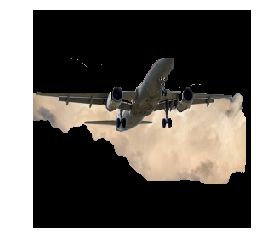

In [13]:
# Show image
plt.imshow(image_rgb_nobg), plt.axis('off')
plt.show()